<a href="https://colab.research.google.com/github/hellloooooo/CHMP/blob/main/%D0%A2%D1%80%D0%BE%D1%85%D0%B8%D0%BC%D0%B5%D1%86%D1%8C_%D0%BF%D1%80_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Трохимець М.В. ФІТ 4-8

Варіант 30

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#1. Вивести перших 5 рядків.

california_housing = fetch_california_housing()

df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

df['target'] = california_housing.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.shape

(20640, 9)

In [4]:
# Перевірити наявність пропусків. У разі виявлення замінити на
#середнє значення.

print("Кількість пропусків у кожному стовпці:\n", df.isnull().sum())

Кількість пропусків у кожному стовпці:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [5]:
# Перевірити наявність дублікатів, при виявленні – видалити.

print(f"Кількість дублікатів у датасеті: {df.duplicated().sum()}")

Кількість дублікатів у датасеті: 0


In [6]:
# Перевірити тип даних. При необхідності замінити тип даних на числовий.

print("Типи даних:")
print(df.dtypes)


Типи даних:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object


In [7]:
#2. Масштабувати ознаки.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))

scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['target'] = df['target']

scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


In [8]:
#3. Поділити дані на тренувальні і тестові.

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Розмір тренувальної вибірки: {X_train.shape[0]}')
print(f'Розмір тестової вибірки: {X_test.shape[0]}')

Розмір тренувальної вибірки: 16512
Розмір тестової вибірки: 4128


In [10]:
#4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge.
#Підібрати оптимальні параметри за допомогою GridSeach.

models = {
    'Linear Regression': LinearRegression(),

    'Random Forest Regressor': RandomForestRegressor(),

    'Ridge Regression': Ridge()
}


param_grids = {
   'Random Forest Regressor': {
       'n_estimators': [50, 100, 200],
       'max_depth': [None, 10, 20],
    },
    'Ridge Regression': {
        'alpha': [0.1, 1.0, 10.0]
    }
}


best_models = {}

for name, model in models.items():
  print(f"\nНалаштування параметрів для {name}...")
  if name in param_grids:
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
  else:
     best_models[name] = model.fit(X_train, y_train)
     print(f"{name} не потребує налаштування параметрів.")




Налаштування параметрів для Linear Regression...
Linear Regression не потребує налаштування параметрів.

Налаштування параметрів для Random Forest Regressor...
Найкращі параметри для Random Forest Regressor: {'max_depth': 20, 'n_estimators': 200}

Налаштування параметрів для Ridge Regression...
Найкращі параметри для Ridge Regression: {'alpha': 10.0}


In [11]:
#5. Вивести R^2 і MSE. Побудувати графіки.
for name, model in best_models.items():
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f"\nОцінка {name}:")
  print(f"Mean Squared Error: {mse:.2f}:")
  print(f"R^2 Score: {r2:.2f}:")


Оцінка Linear Regression:
Mean Squared Error: 0.56:
R^2 Score: 0.58:

Оцінка Random Forest Regressor:
Mean Squared Error: 0.25:
R^2 Score: 0.81:

Оцінка Ridge Regression:
Mean Squared Error: 0.56:
R^2 Score: 0.58:


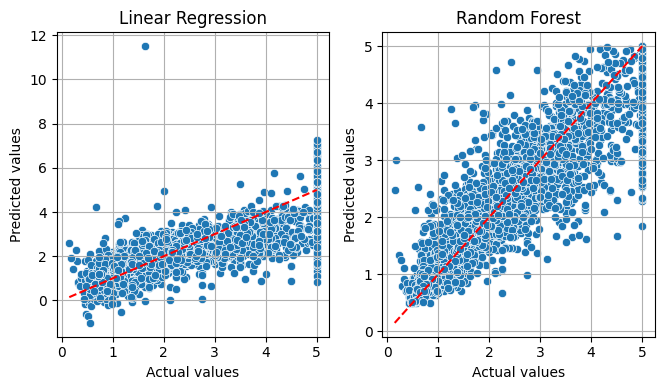

In [12]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=best_models['Linear Regression'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=best_models['Random Forest Regressor'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
#6. Вивести справжні і прогнозовані значення.

results_df = pd.DataFrame({
    'Справжні значення': y_test,  # Справжні значення
    'Прогноз (Лінійна регресія)': best_models['Linear Regression'].predict(X_test),  # Прогноз лінійної регресії
    'Прогноз (RandomForest регресія)': best_models['Random Forest Regressor'].predict(X_test),  # Прогноз RandomForest регресії
    'Прогноз (Ridge регресія)': best_models['Ridge Regression'].predict(X_test)  # Прогноз Ridge регресії
})

results_df.head(10)



,Справжні значення,Прогноз (Лінійна регресія),Прогноз (RandomForest регресія),Прогноз (Ridge регресія)
20046,0.47700,0.719123,0.491257,0.720285
3024,0.45800,1.764017,0.716402,1.763370
15663,5.00001,2.709659,4.866301,2.704098
20484,2.18600,2.838926,2.618768,2.839409
9814,2.78000,2.604657,2.349531,2.605720
13311,1.58700,2.011754,1.633767,2.012122
7113,1.98200,2.645500,2.377867,2.646395
7668,1.57500,2.168755,1.664753,2.168901
18246,3.40000,2.740746,2.636792,2.734688
5723,4.46600,3.915615,4.870573,3.915170


**Висновок:** Регресія **RandomForest** є найкращою моделлю серед трьох розглянутим для даного завдання. Вона забезпечує кращу точність і узгодженість прогнозів. Лінійна регресія та **Ridge** регресія можуть використовуватися як базові моделі для оцінки, але вони мають певні обмеження при прогнозуванні складних взаємозалежностей.